# Timeseries data


A timeseries is (unsurprisingly) a series of measurements of the same thing, over time.

Often the best way to visualize a timeseries is with `sns.lineplot()`, which can be used to plot:
* Timeseries of a single value (such as the temperature on Christmas Day over the years)
* Multiple timeseries in parallel (such as the temperature in each month over the years)
* Timeseries of a summary statistic (such as mean temperature) with errorbars


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Timeseries of a single value

For example, let's look again at the Oxford weather data:

In [2]:
weather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/OxfordWeather.csv")
display(weather)

,YYYY,Month,MM,DD,DD365,Tmax,Tmin,Tmean,Trange,Rainfall_mm
0,1827,Jan,1,1,1,8.3,5.6,7.0,2.7,0.0
1,1827,Jan,1,2,2,2.2,0.0,1.1,2.2,0.0
2,1827,Jan,1,3,3,-2.2,-8.3,-5.3,6.1,9.7
3,1827,Jan,1,4,4,-1.7,-7.8,-4.8,6.1,0.0
4,1827,Jan,1,5,5,0.0,-10.6,-5.3,10.6,0.0
...,...,...,...,...,...,...,...,...,...,...
71338,2022,Apr,4,26,116,15.2,4.1,9.7,11.1,0.0
71339,2022,Apr,4,27,117,10.7,2.6,6.7,8.1,0.0
71340,2022,Apr,4,28,118,12.7,3.9,8.3,8.8,0.0
71341,2022,Apr,4,29,119,11.7,6.7,9.2,5.0,0.0


#### Is the temperature increasing?

Let's try plotting the temperature on a particular day over the years to see if temperature is increasing.

How about plotting the temperature on Halloween (31st October)?


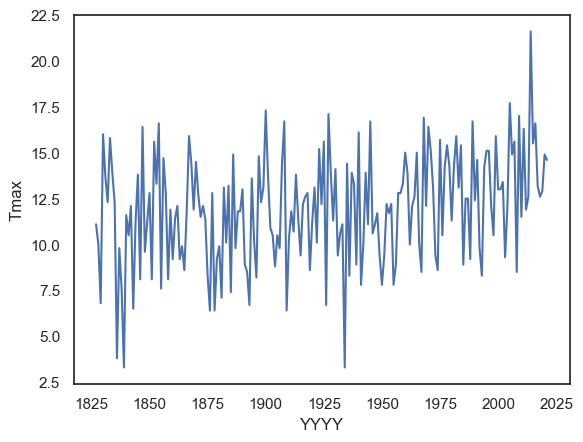

In [3]:
sns.lineplot(data = weather.query('MM==10 and DD==31'), x="YYYY", y='Tmax')
plt.show() # this command asks Python to output the plot created above 

NOTE - did you notice the use of `weather.query('MM==10 and DD==31')` as the dataset in the plotting function above?

Effectively what we did there was create a new dataframe from which to make the plot - we could have done this more explicitly:

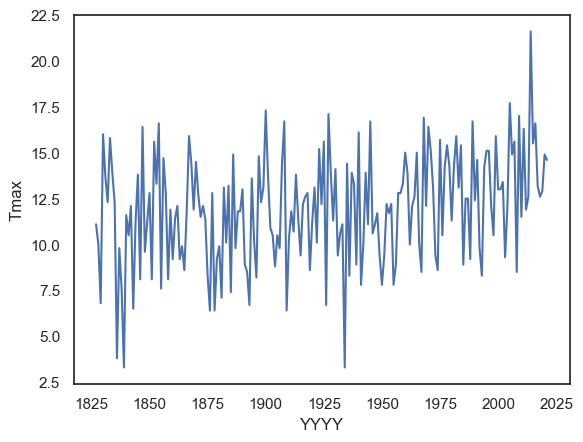

In [4]:
halloween = weather.query('MM==10 and DD==31')
sns.lineplot(data = halloween, x="YYYY", y='Tmax')
plt.show() # this command asks Python to output the plot created above 

The first version, which didn't explicitly create and name a second dataframe, is just a bit tidier (once you start having multiple copies of your data it is easy to make a mistake where you do something to one and not another) but both solutions do work.

## Timeseries of a summary statistic

Sometimes we want our line to represent not each individual line of the dataframe, but some summary value.

For example, if we want to plot the mean temperature in each year, that would be the average of 365 values in our data table (the 365 values for <tt>Tmean</tt> for each year). 

If the $x$ variable has the same value in many rows of the dataframe (for example, each value of year, <tt>YYYY</tt>, appears in 365 rows of our dataframe), `sns.lineplot()` automatically plots the mean of those values, with shading to represent the uncertainty associated with those values 
* the default is that the shading represents the 95% confidence interval, which is about 2x the standard error
* this tells us something about the estimated measurement variability and sampling error
* the standard error is defined as $SD/\sqrt{n}$ and will be covered later in the course

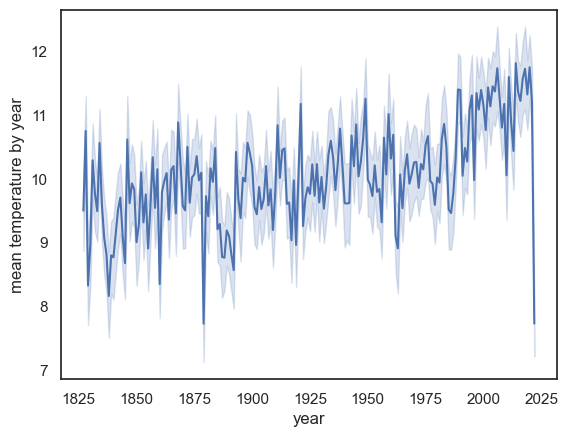

In [5]:
sns.lineplot(data = weather, x="YYYY", y='Tmean')
plt.ylabel('mean temperature by year'), plt.xlabel('year')
plt.show() # this command asks Python to output the plot created above 

**Note-**
* The mean temperature appears to be rising
* There is a massive drop in the last year on record, 2022! Why?
    * HINT: check the date of the final recording in 2022
    
### Modifying Lineplot

We can use additional arguments to get `sns.lineplot()` to plot a different descriptive statistic and a different choice of errorbars/shading.

* we can use any `numpy` function as the *estimator* (the summmary statistic). 
* numpy includes functions for common descriptive statistics, a list can be found <a href="https://numpy.org/doc/stable/reference/routines.statistics.html">here</a>
* numpy functions are preceded by `np.`, eg `np.median()` or `np.corr()`
* note that we normally use the `pandas` functions to get the same descriptive statistics, but here we need to use `numpy` because that is what `sns.lineplot()` expects


For example instead of the mean we can plot the median:

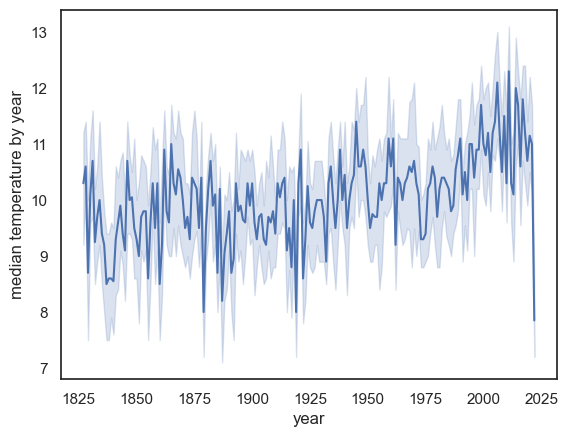

In [6]:
sns.lineplot(data = weather, x="YYYY", y='Tmean', estimator=np.median)
plt.ylabel('median temperature by year'), plt.xlabel('year')
plt.show() # this command asks Python to output the plot created above 

#### Exercises

Try plotting the maximum temperature in each year
* you will need to use a different colummn of the dataframe and also a different *estimator*

In [7]:
# Your code here

## Timeseries for multiple categories

We can create lineplots *disaggregated* by a categorical variable by using the `hue` argument.

Let's plot the mean temperature in each month, over the years:

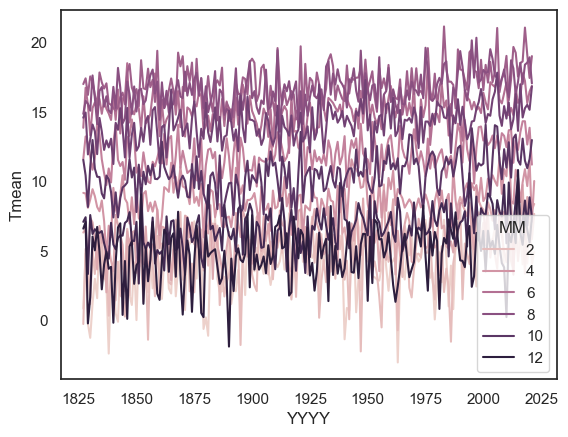

In [8]:
sns.lineplot(data=weather, x='YYYY', y='Tmean', hue='MM', errorbar=None)
plt.show()